In [12]:
import numpy as np
import sklearn as sk
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import random




In [5]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,53827.0,1.325449,-0.096853,0.136428,-0.454659,-0.155413,-0.030145,-0.333723,0.053301,0.206441,...,-0.159238,-0.469916,-0.059018,-0.773554,0.245962,0.959280,-0.075419,-0.012681,0.77,0
1,50599.0,-1.131888,-0.643269,1.563501,-0.778753,-1.396825,1.050611,-0.156071,0.334781,-0.893654,...,0.446117,1.670640,0.333726,-0.257075,-0.445065,0.090099,0.383209,0.107440,189.00,0
2,121802.0,-1.339828,0.622336,0.464747,-2.546672,-0.179661,-0.464931,0.009343,0.368613,-0.724052,...,0.137587,0.055247,-0.556338,-1.039617,0.933901,-0.073119,-0.315587,0.030755,10.00,0
3,124479.0,-0.539514,1.527861,-1.232152,0.187369,0.012595,-1.011595,0.210122,0.630842,-0.718455,...,0.546462,1.424260,0.005780,-0.035004,-1.071434,-0.177897,-0.064486,0.158808,20.93,0
4,123987.0,-2.752225,-0.869963,0.703499,-0.945487,1.342470,0.973891,-0.168117,0.599367,0.716579,...,0.048130,0.979358,0.226278,-1.575234,0.066395,0.823880,0.546455,0.987540,92.00,0


In [6]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


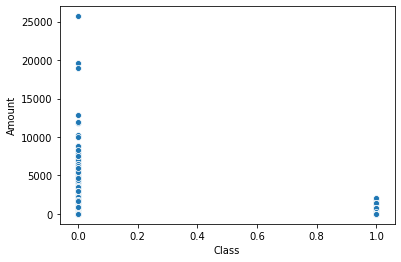

In [13]:
#visualize
sns.scatterplot(x='Class', y='Amount', data=df)

# **Fraud detection


*   Explore the data set/ visualize 
*  Decide which features are important
*   Perform machine learning
*  Test the model on the testing set.







In [19]:
#Time to write the model

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [20]:
x = df.iloc [:, :-1]
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)



In [21]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, Y_train)
print('Score:', logistic.score, (X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: <bound method ClassifierMixin.score of LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)> (            Time        V1        V2        V3        V4        V5        V6  \
218239   99472.0 -0.551488  1.391582  0.863777  1.278519 -0.549607  1.421379   
130881   39860.0  1.326913 -0.601837  0.159064 -0.471879 -0.929957 -0.832374   
141415  133614.0  1.869913 -0.573923 -0.413813  1.268083 -0.659919  0.135353   
100372   21068.0  1.162263 -0.368350  1.132327 -0.478254 -1.189775 -0.509490   
48711    65889.0 -0.470041  0.984112  1.666275 -0.097331 -0.137320 -0.695411   
...          ...       ...       ...       ...       ...       ...       ...   
158469   54563.0 -0.887092  0.706838  1.732832 -1.310538  0.02

In [23]:
Y_prediction = np.array(logistic.predict(X_test))
print(Y_prediction)

[0 0 0 ... 0 0 0]


In [24]:
from sklearn.metrics import accuracy_score
y_predict = logistic.predict(X_test)
accuracy_score(y_predict, Y_test)

0.9988904806044774